In [1]:
import sys
sys.path.append('/home/loringm/proliferation-and-track')

In [20]:
from tracking import find_match, map_matches, calculate_diff_matrix
import numpy as np
from scipy import ndimage
import tifffile
import zarr
import matplotlib.pyplot as plt

In [18]:
zarr_dir = '/home/loringm/Downloads/SIMULATED_DATASET/01/data.n5'
data = zarr.open(zarr_dir)

imgs = data['GT'][:, 30, 144:400, 144:400]

bnr_images = [np.array(img > 0, dtype=np.int8) for img in imgs]
labeled_images = [ndimage.label(bnrimage)[0] for bnrimage in bnr_images]

remapped_images = []
for i in range(len(labeled_images)):
    if i != 0:
        if labeled_images[i-1].max() != 0:
            match_dic, l1_shape = find_match(labeled_images[i], labeled_images[i-1])

            predicted_image = map_matches(labeled_images[i], match_dic, l1_shape)

            remapped_images.append(predicted_image)
        else:
            remapped_images.append(labeled_images[i])

fin = np.array(remapped_images)
# tifffile.imsave('mywonderful_remap.tiff', fin)

In [22]:
weights = calculate_diff_matrix(labeled_images[2], labeled_images[1])

In [25]:
match_dic, l1_shape = find_match(labeled_images[2], labeled_images[1])


In [23]:
weights

array([[9.70651327e+07, 9.70651327e+07, 9.70651327e+07],
       [9.70651327e+07, 2.17547663e+01, 1.50840710e+01]])

In [26]:
match_dic

{0: 2, 1: 4, 2: 0, 4: 1}

In [28]:
weights

array([[9.70651327e+07, 9.70651327e+07, 9.70651327e+07],
       [9.70651327e+07, 2.17547663e+01, 1.50840710e+01]])

In [29]:
weights.ravel()

array([9.70651327e+07, 9.70651327e+07, 9.70651327e+07, 9.70651327e+07,
       2.17547663e+01, 1.50840710e+01])

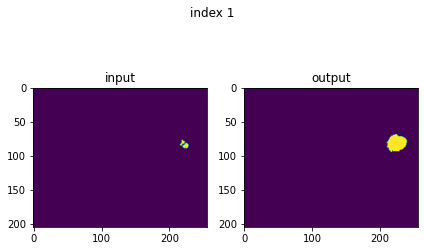

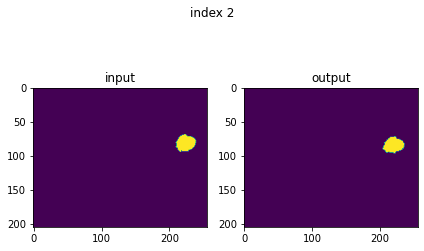

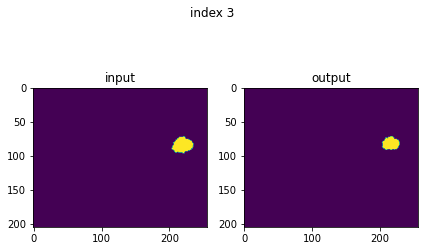

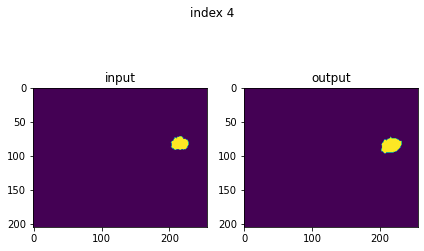

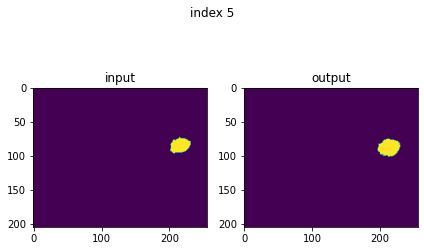

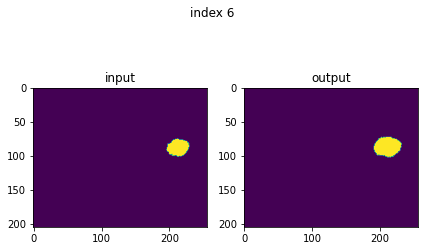

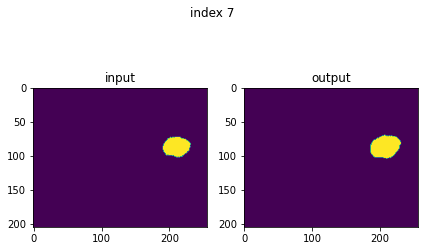

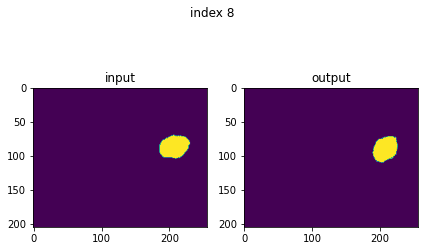

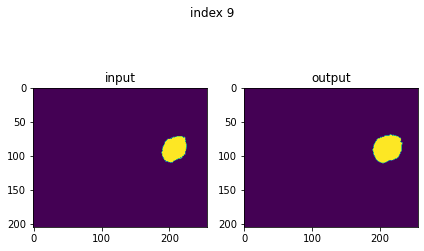

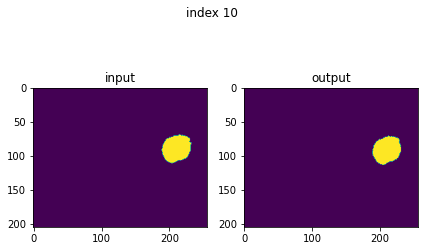

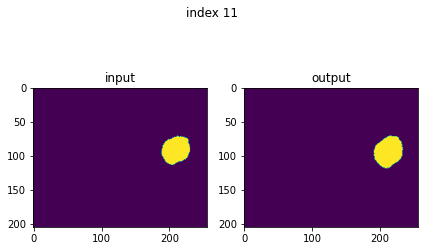

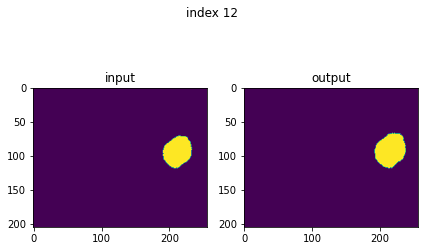

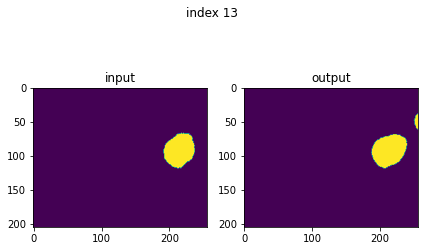

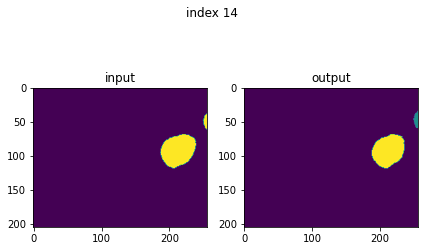

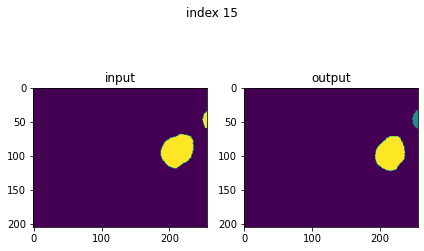

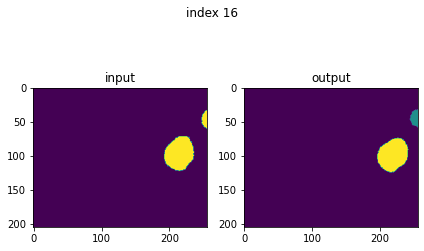

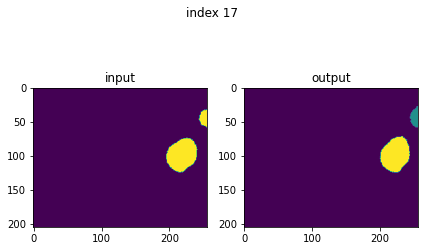

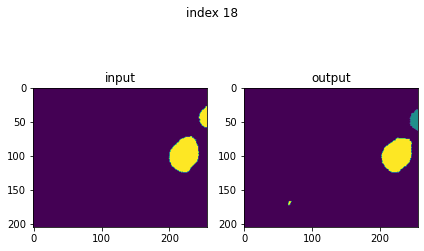

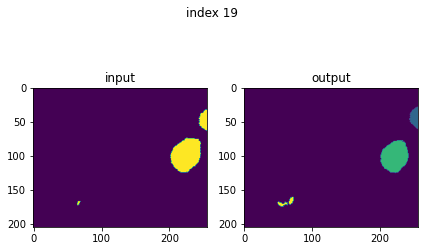

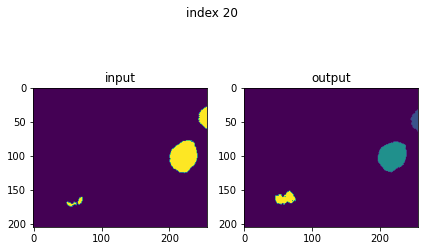

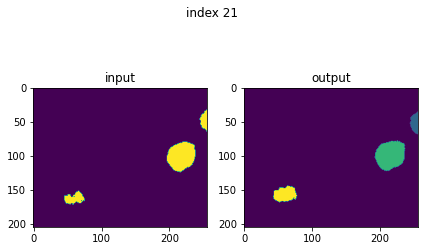

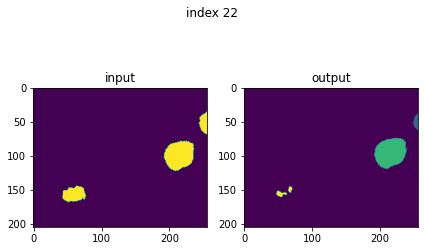

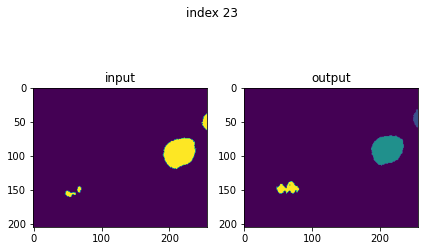

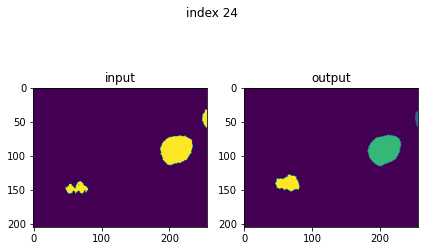

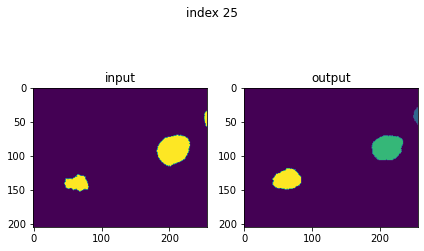

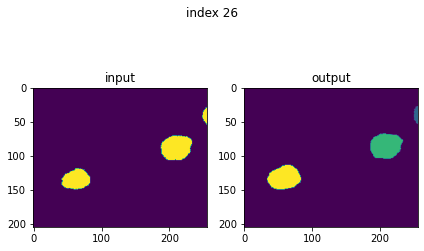

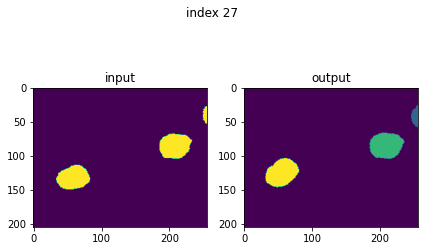

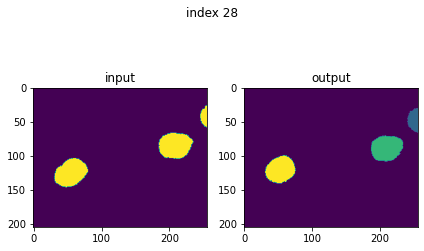

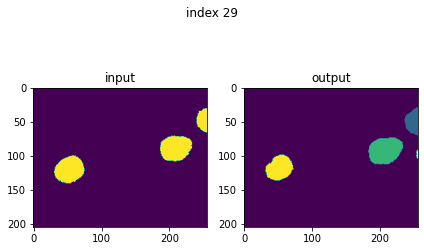

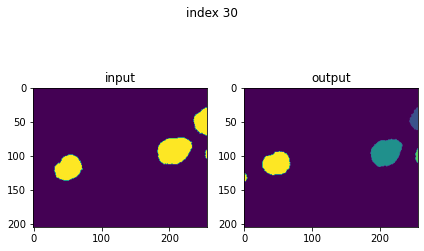

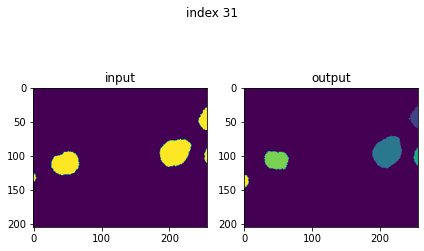

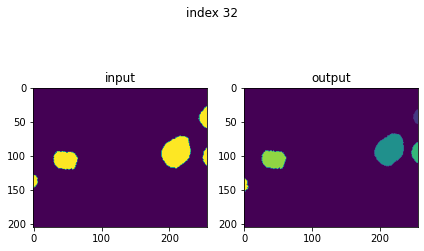

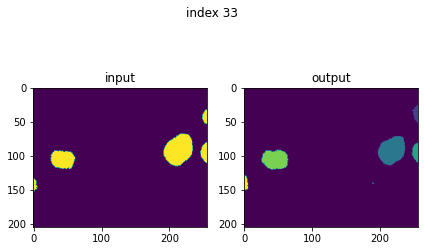

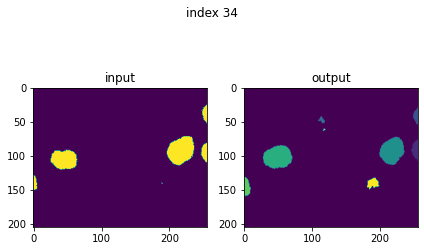

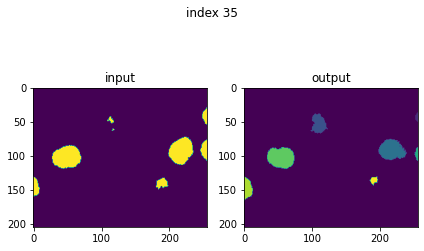

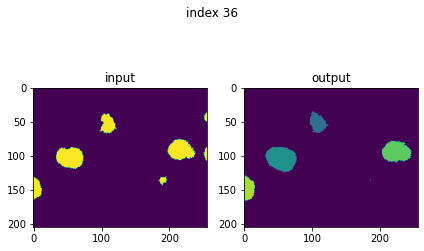

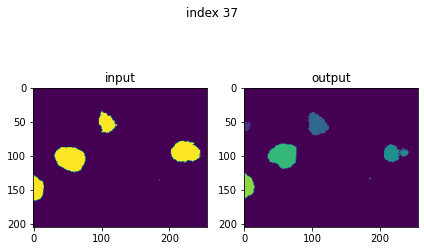

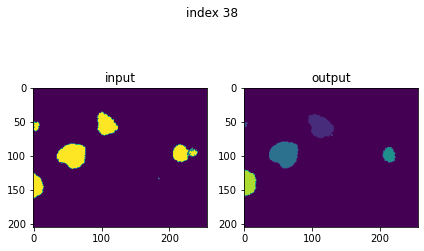

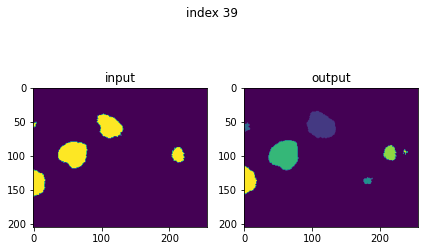

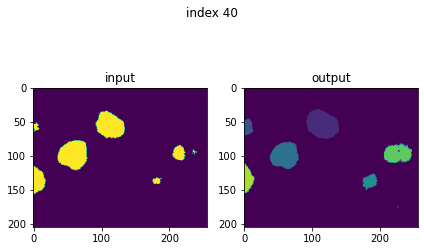

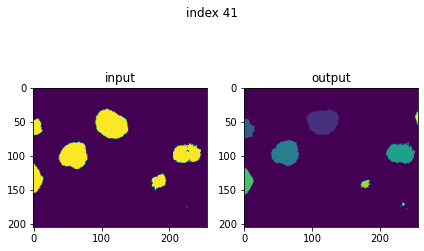

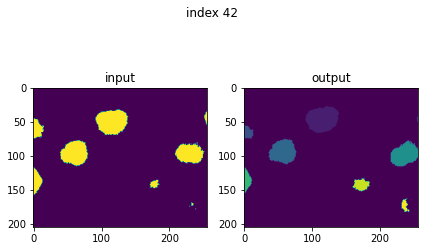

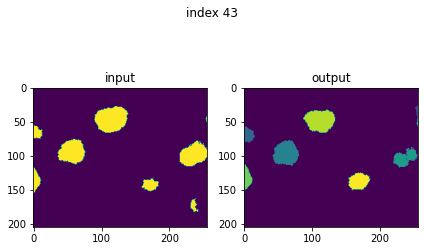

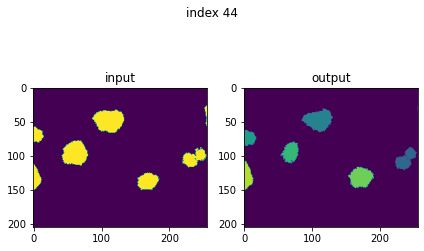

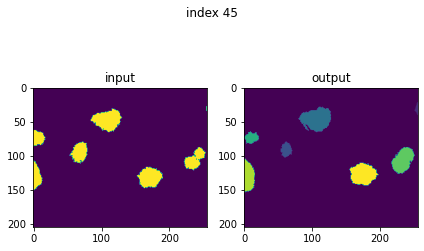

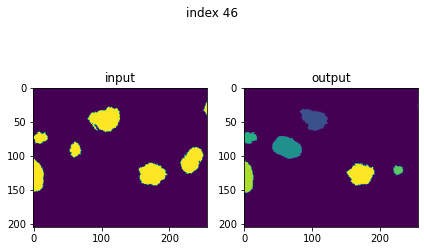

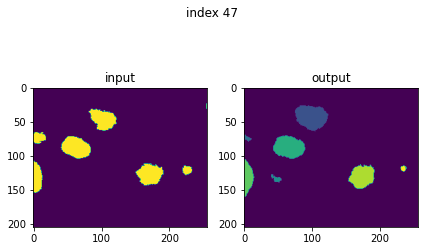

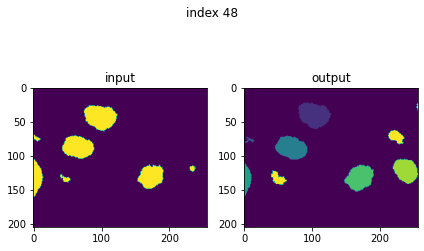

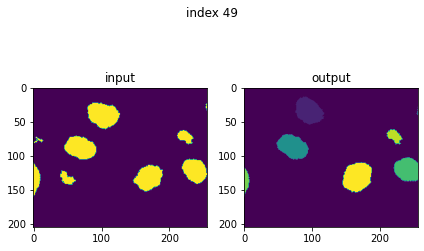

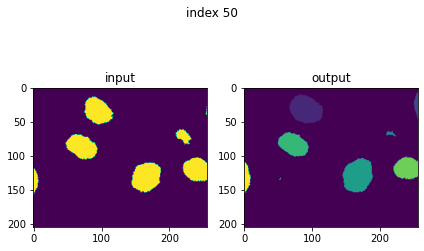

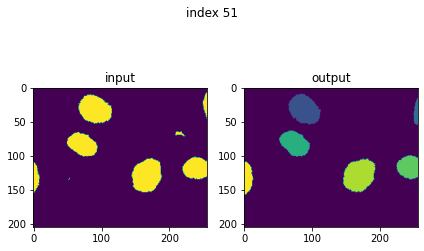

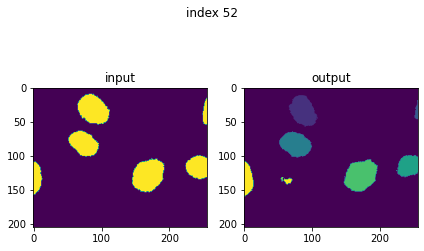

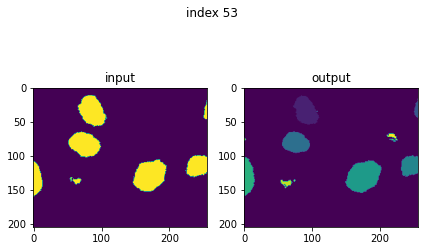

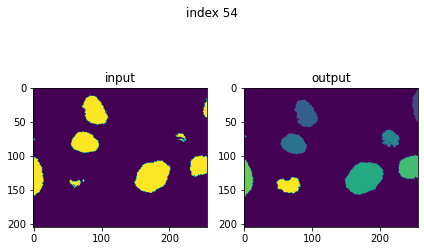

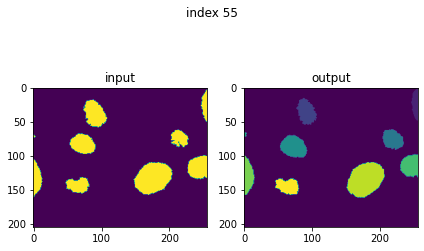

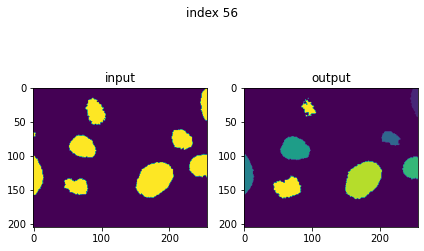

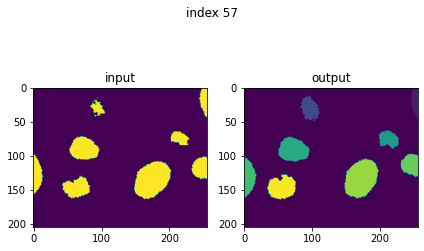

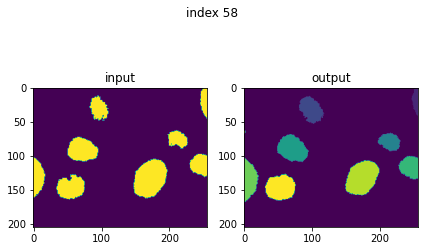

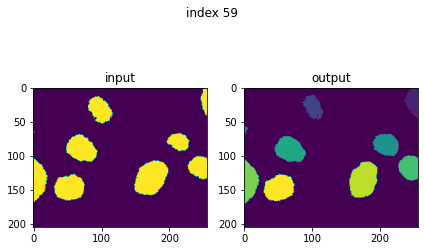

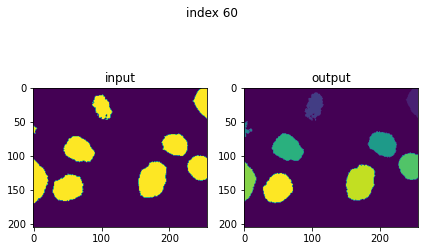

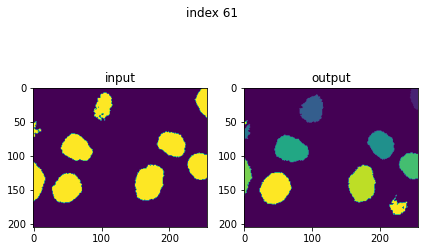

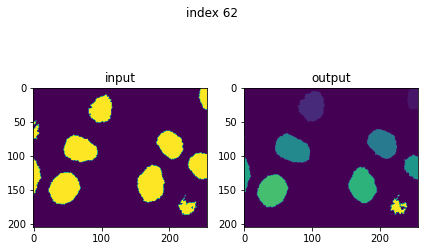

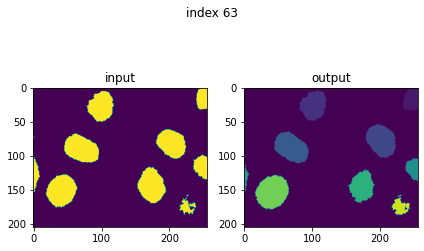

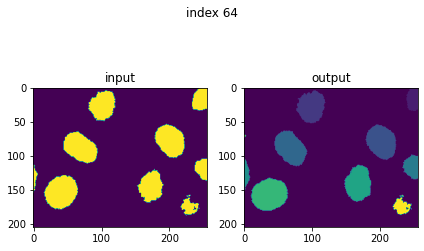

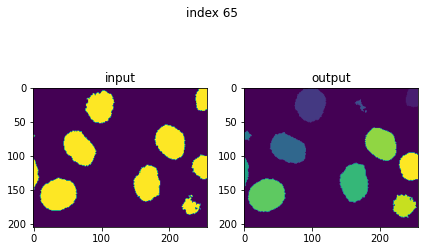

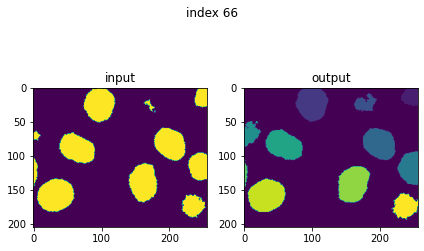

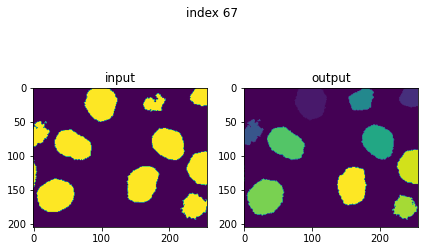

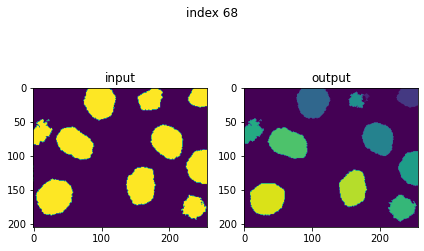

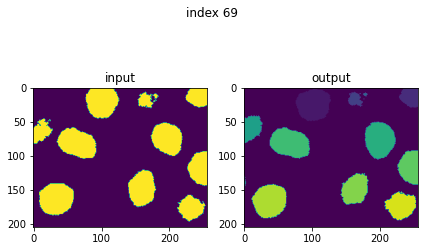

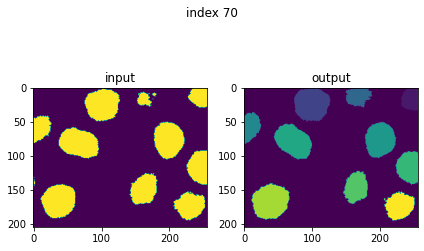

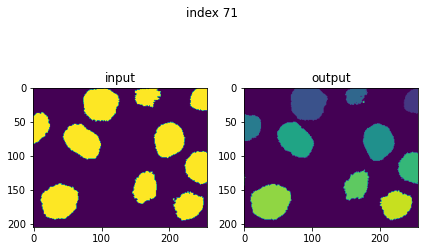

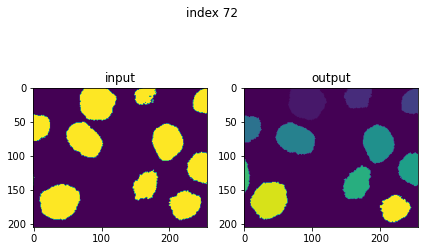

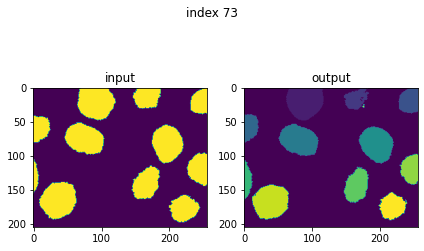

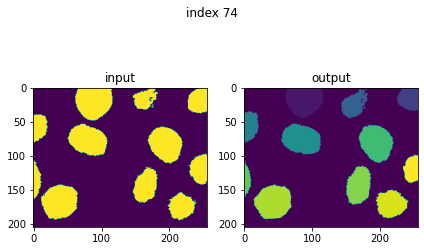

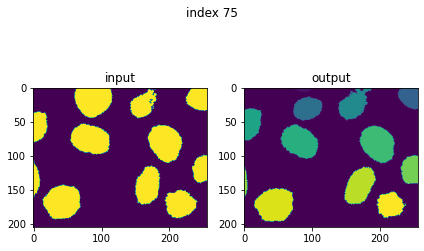

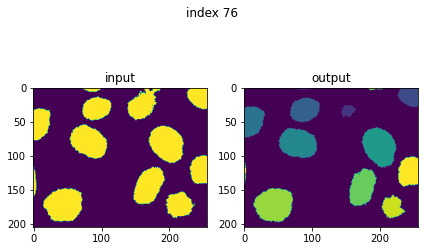

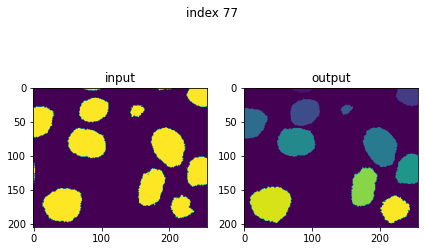

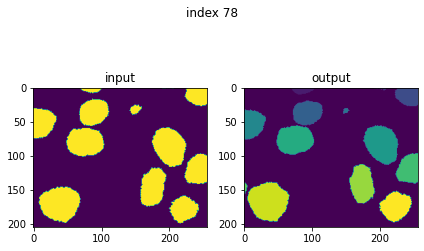

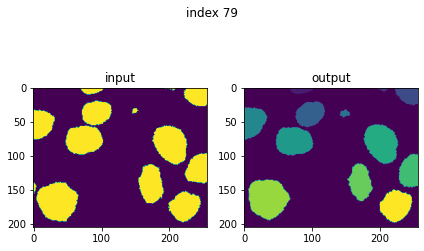

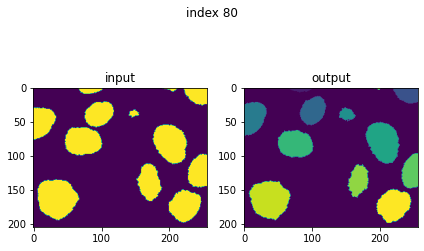

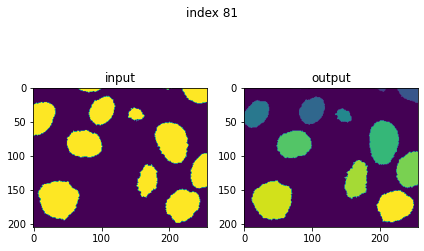

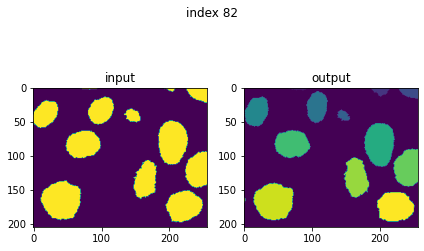

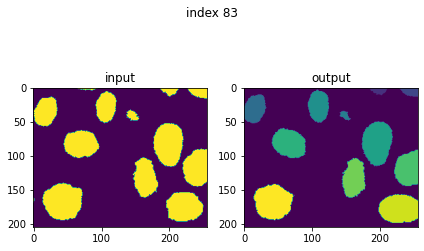

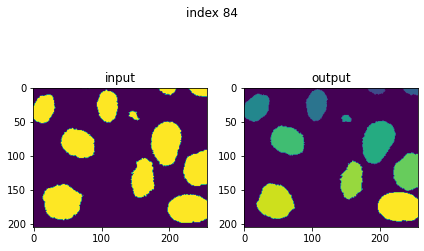

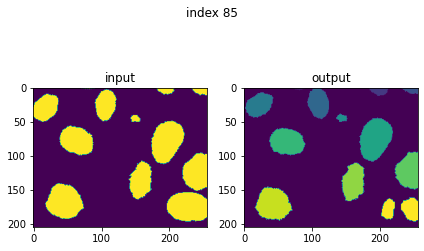

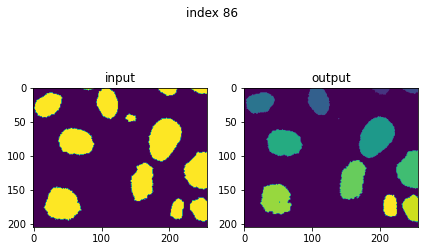

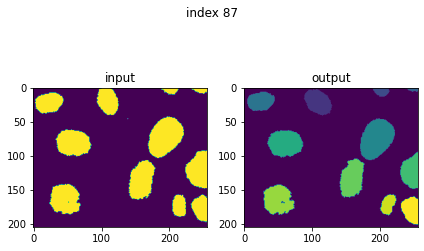

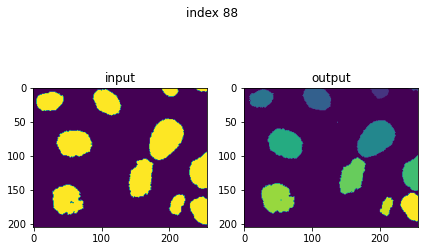

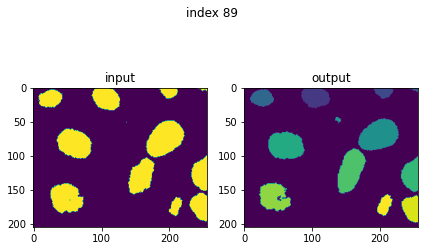

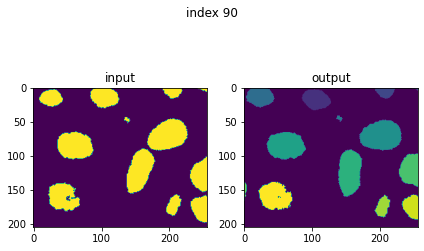

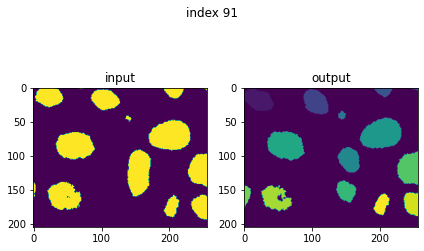

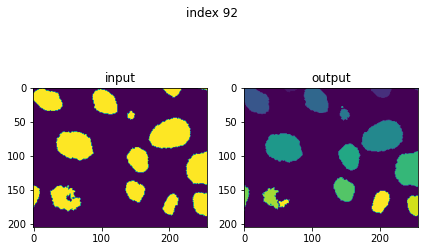

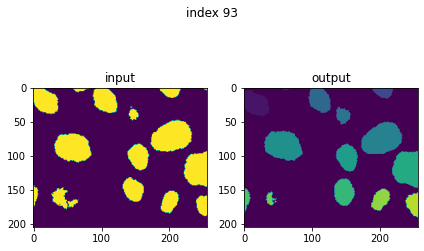

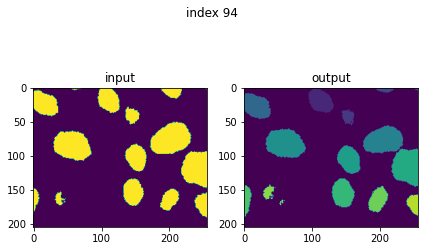

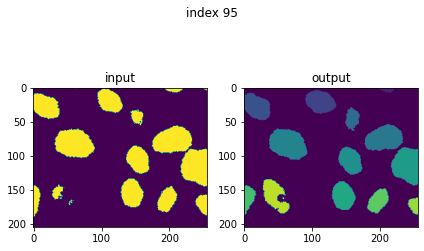

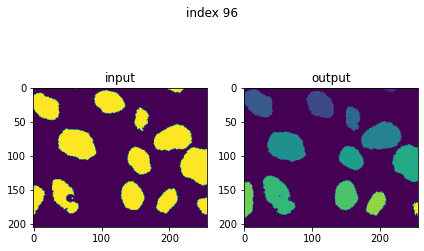

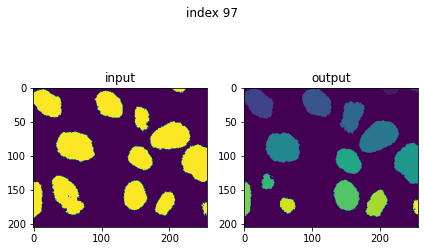

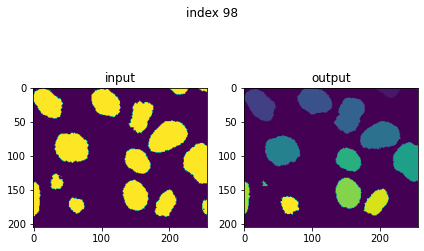

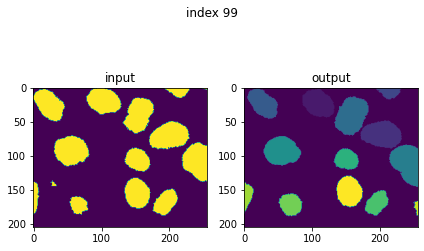

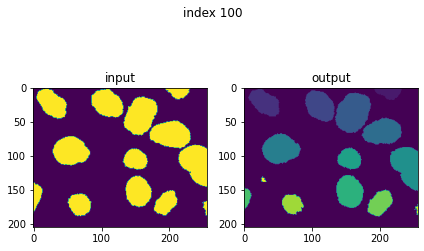

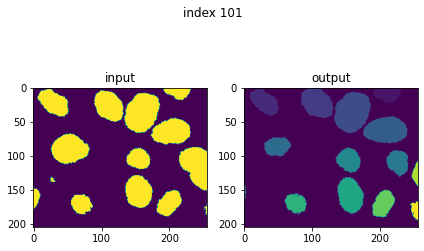

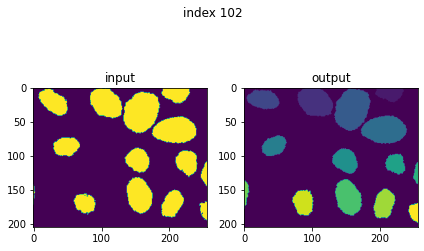

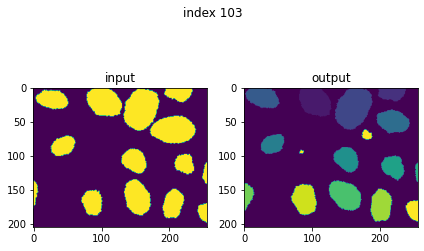

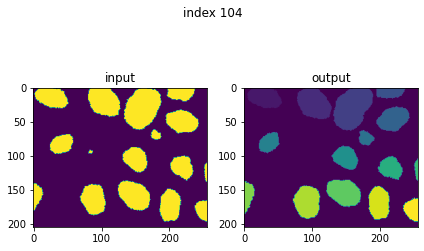

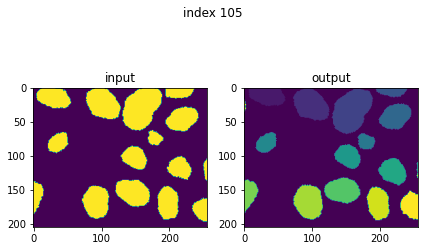

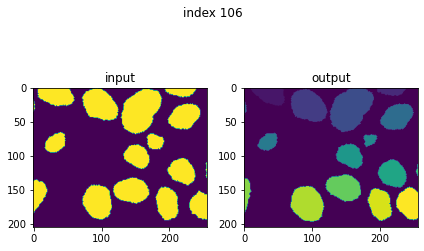

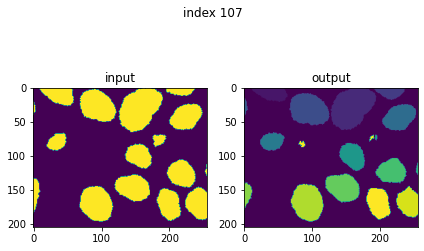

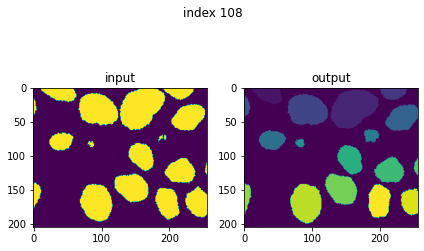

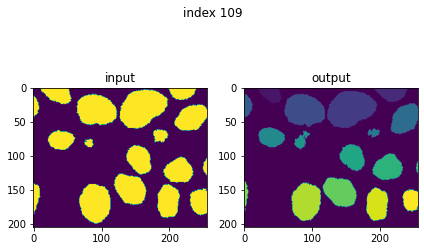

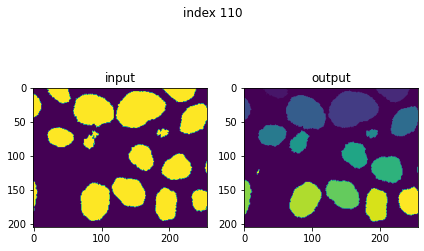

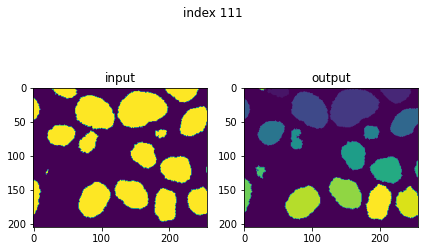

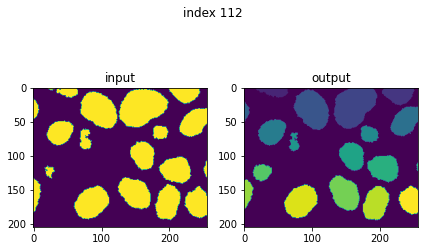

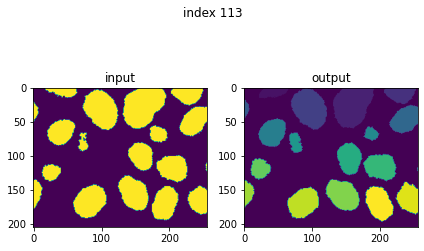

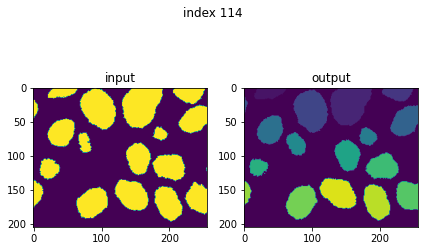

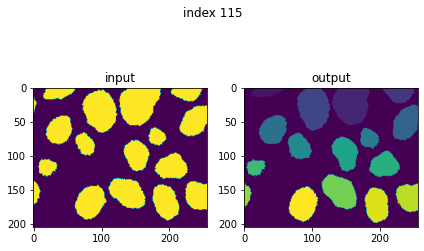

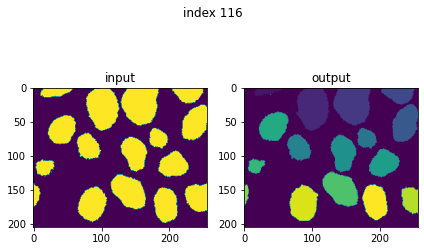

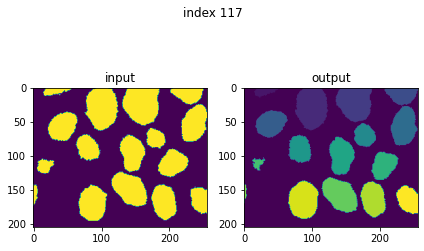

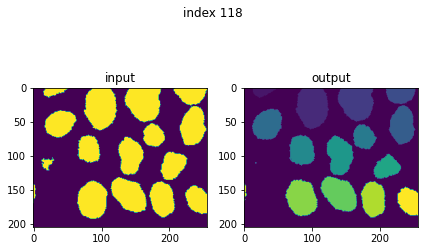

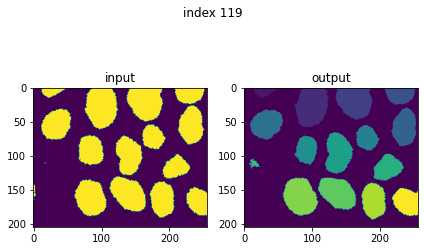

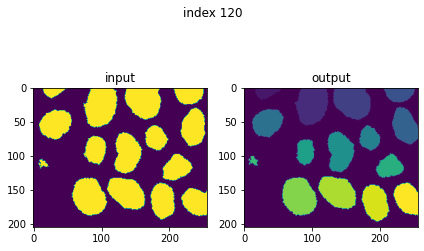

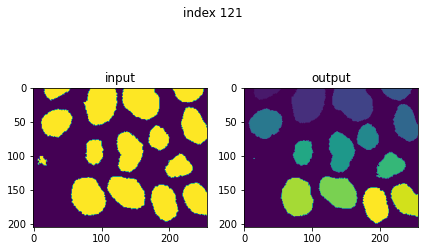

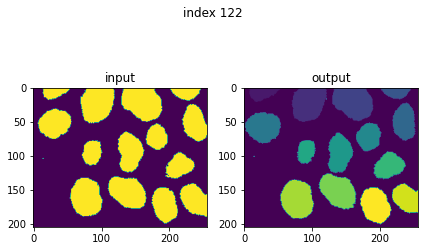

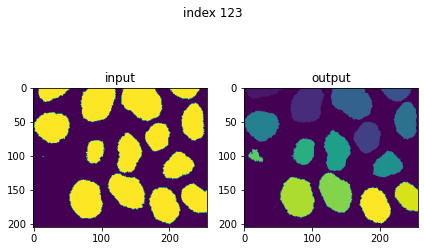

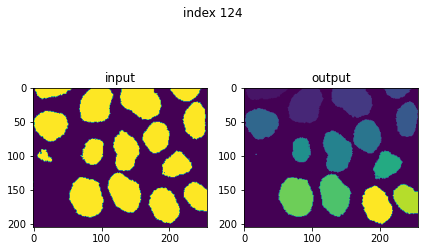

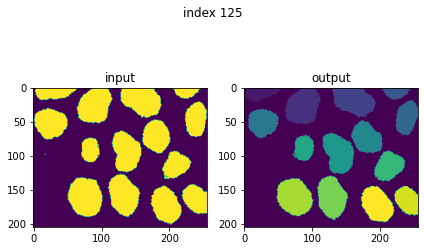

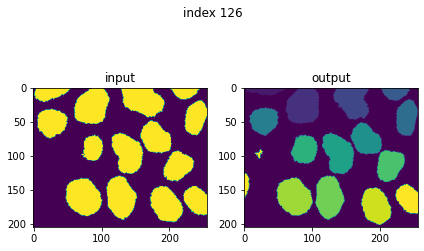

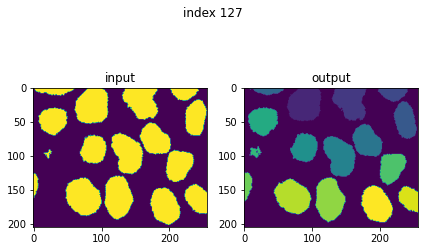

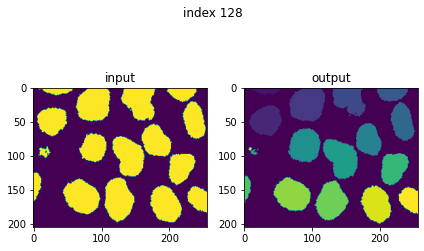

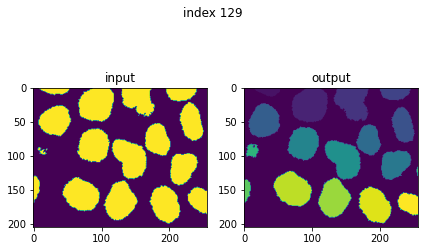

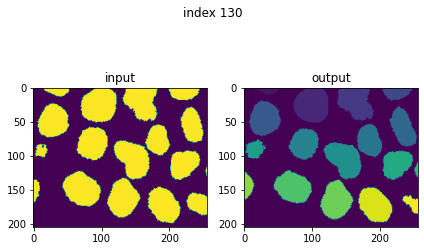

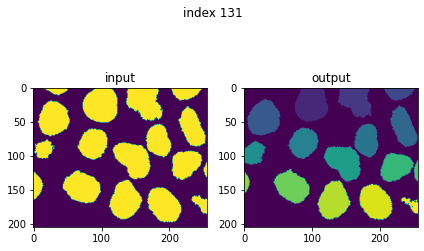

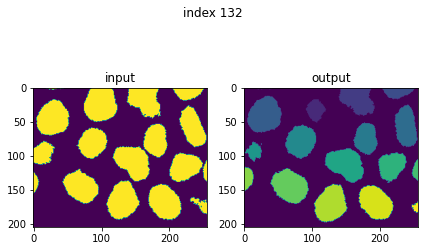

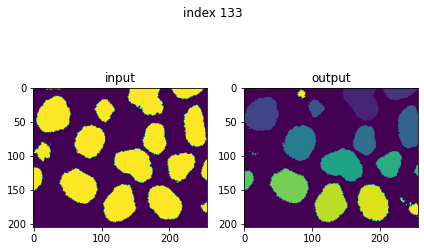

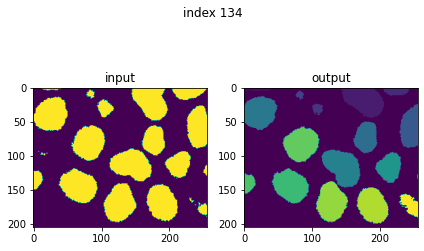

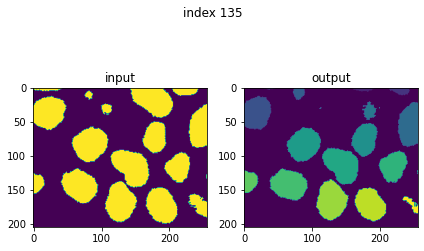

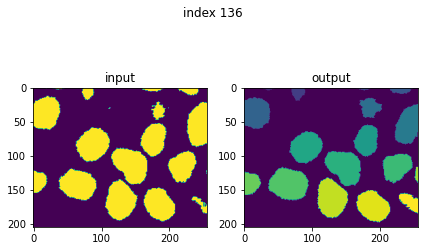

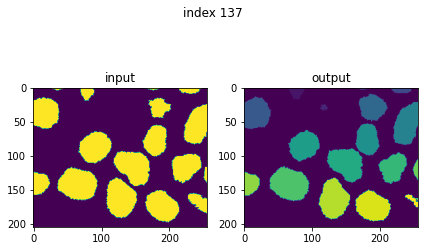

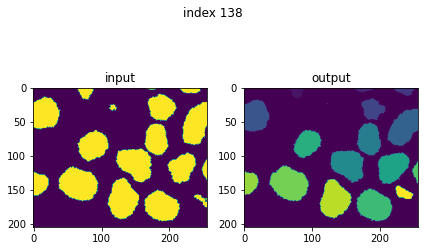

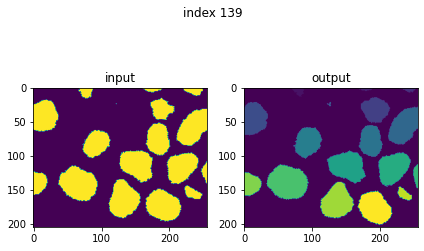

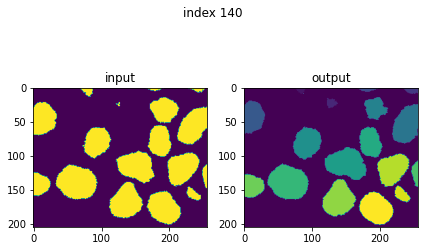

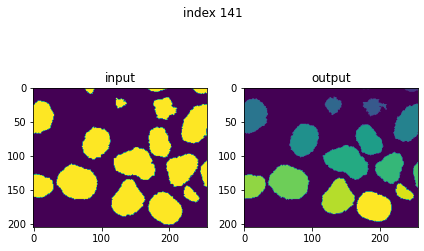

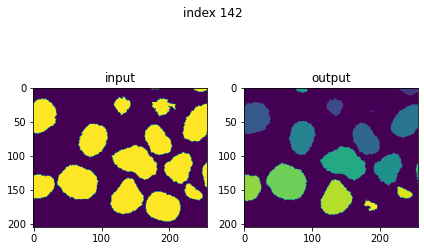

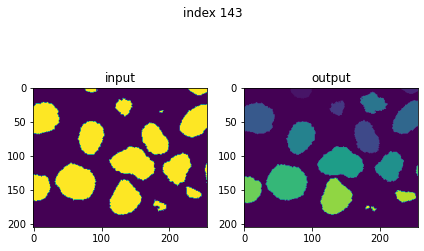

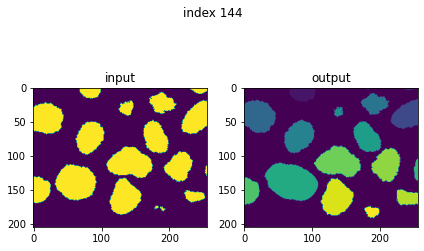

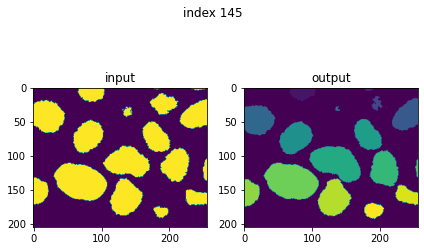

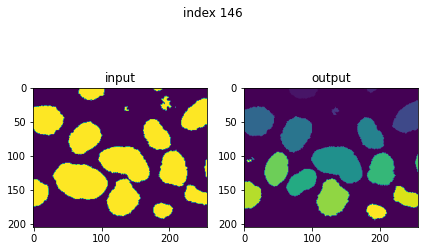

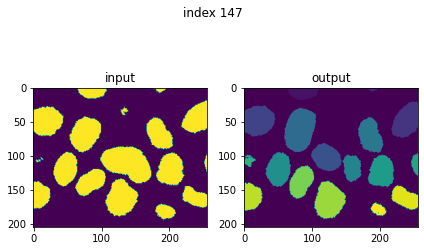

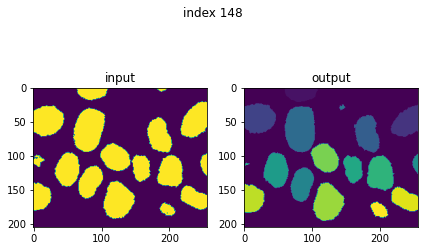

In [31]:
for i in range(len(bnr_images)):
    if i is not 0:
        fig, ax = plt.subplots(1,2)
        ax[0].imshow(bnr_images[i],)
        ax[0].set_title('input')
        
        ax[1].imshow(np.array(remapped_images[i]),)
        ax[1].set_title('output')
        fig.suptitle(f'index {i}')
        
        plt.tight_layout()
        plt.show()
    if i == len(remapped_images)-1 :
        break

took alternate route


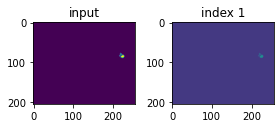

In [17]:
n = 1
if labeled_images[n-1].max() != 0:
    match_dic, l1_shape = find_match(labeled_images[n], labeled_images[n-1], True)
    predicted_image = map_matches(labeled_images[n], match_dic, l1_shape)
else:
    print('took alternate route')
    predicted_image = labeled_images[n]

fig, ax = plt.subplots(1,2, figsize=(4,4))
ax[0].imshow(labeled_images[n])
ax[0].set_title('input')

ax[1].imshow(predicted_image, vmin=-1,vmax=5)
ax[1].set_title('output')
plt.title(f'index {n}')

plt.tight_layout()

In [13]:
np.unique(predicted_image)

array([0, 1, 2], dtype=int32)

In [ ]:
n = 1
if labeled_images[n-1].max() != 0:
    match_dic, l1_shape = find_match(labeled_images[n], labeled_images[n-1], True)
    predicted_image = map_matches(labeled_images[n], match_dic, l1_shape)
else:
    print('took alternate route')
    predicted_image = labeled_images[n]

fig, ax = plt.subplots(1,2, figsize=(4,4))
ax[0].imshow(labeled_images[n])
ax[0].set_title('input')

ax[1].imshow(predicted_image, vmin=-1,vmax=5)
ax[1].set_title('output')
plt.title(f'index {n}')


In [6]:
display(match_dic, predicted_image.max(), predicted_image.min())

{1: 12, 5: 14, 6: 13, 7: 17, 8: 15, 9: 16, 10: 18, 2: 18, 3: 18, 4: 18, 0: 11}

7

0

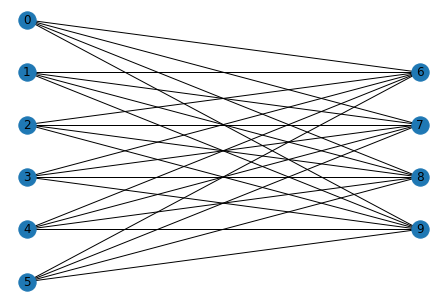

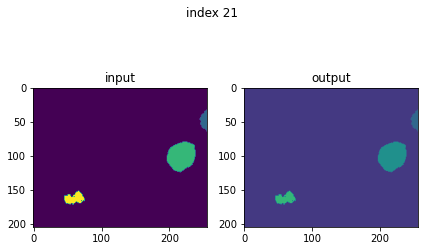

In [7]:
n = 21
if labeled_images[n-1].max() != 0:
    match_dic, l1_shape = find_match(labeled_images[n-1], labeled_images[n], True)
    predicted_image = map_matches(labeled_images[n], match_dic, l1_shape)
else:
    print('took alternate route')
    predicted_image = labeled_images[n]

fig, ax = plt.subplots(1,2)
ax[0].imshow(labeled_images[n])
ax[0].set_title('input')

ax[1].imshow(predicted_image, vmin=-1,vmax=5)
ax[1].set_title('output')
fig.suptitle(f'index {n}')

plt.tight_layout()

In [8]:
match_dic

{1: 7, 2: 8, 4: 9, 3: 9, 0: 6}

In [9]:
predicted_image.max()

3

In [10]:
predicted_image.min()

0

In [11]:
l1_shape

6